In [29]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("gm_2008_region.csv")

In [45]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [46]:
X = df["fertility"]
y = df["life"]

In [47]:
X = X.values.reshape(-1,1)

In [48]:
y = y.values.reshape(-1,1)

In [35]:
import matplotlib.pyplot as plt

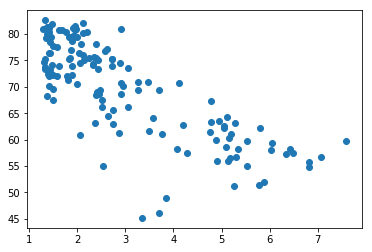

In [36]:
plt.scatter(X,y)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression()

In [51]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [53]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_pred = reg.predict(prediction_space)

In [42]:
mis_classified=[]
for x,y in zip(y, y_pred):
    if x!=y:
        mis_classified.append(x)


In [55]:
print(reg.score(X, y))

0.6192442167740035


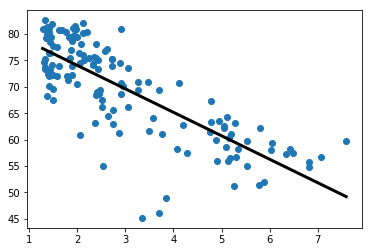

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [62]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [71]:
df = pd.read_csv("gm_2008_region.csv")

In [72]:
df = df.drop(["Region"], axis = 1)

In [73]:
X = df.drop(["life"], axis  = 1)
y = df["life"]


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as tts

In [75]:
X_train, X_test, y_train, y_test = tts(X,y,random_state = 42, test_size = 0.3)

In [76]:
reg_all = LinearRegression()

In [77]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
y_pred = reg_all.predict(X_test)

In [79]:
reg_all.score(X_test, y_test)

0.8380468731430133

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [81]:
rmse

3.2476010800369477

In [82]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [83]:
np.mean(cv_scores)

0.859962772279345

In [84]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.8718712782622262
0.8436128620131267


In [88]:
y.shape

(139,)

In [98]:
len(X)

139

In [100]:
len(y)

139

In [102]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


In [103]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')

In [104]:
df = df.drop(["life"], axis = 1)

In [105]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

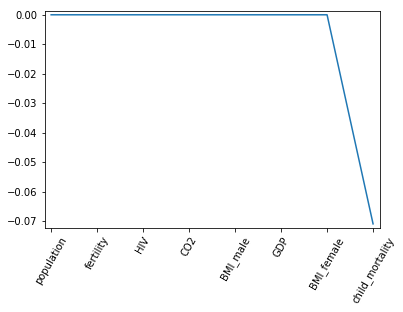

In [106]:

# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()


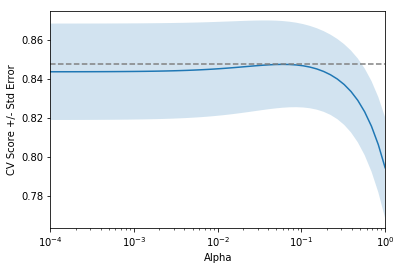

In [108]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

    # Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
